In [1]:
import mnist
import pandas as pd
import numpy as np
train=mnist.train_images()
x = train.reshape((train.shape[0], train.shape[1] * train.shape[2]))
data = pd.DataFrame(x[:20])
df = np.where(data<128,-1,1)

In [2]:
image_list=[]
for i in range(20):
    image_list.append(frame.iloc[i].reshape((28,28)))

NameError: name 'frame' is not defined

In [6]:
noise = pd.read_csv('NoiseCoordinates.csv')
noise.head()
noise_mat = noise.drop('Row Description',axis=1)
noise_mat.head()

,Noisy bit 0,Noisy bit 1,Noisy bit 2,Noisy bit 3,Noisy bit 4,Noisy bit 5,Noisy bit 6,Noisy bit 7,Noisy bit 8,Noisy bit 9,Noisy bit 10,Noisy bit 11,Noisy bit 12,Noisy bit 13,Noisy bit 14
0,21,3,10,27,19,24,7,0,25,6,7,15,14,17,23
1,17,17,22,9,20,5,2,3,12,26,5,24,6,23,3
2,26,9,4,0,20,5,23,3,14,21,15,2,15,3,27
3,17,3,20,22,6,24,18,10,20,8,21,20,24,1,7
4,13,24,24,11,0,11,26,18,12,12,17,8,20,0,6


In [4]:
img1 = df[0].reshape((28,28))
#scipy.misc.toimage(scipy.misc.imresize(img1 * -1 + 256, 10.))
for i in range(15):
    r = noise_mat.ix[0,i]
    c = noise_mat.ix[1,i]
    if img1[r,c]==1:
        img1[r,c]=-1
    else:
        img1[r,c]=1
scipy.misc.toimage(scipy.misc.imresize(img1 * -1 + 256, 10.))

NameError: name 'scipy' is not defined

In [7]:
image_list_df=[]
for i in range(20):
    dat = pd.DataFrame(image_list[i])
    image_list_df.append(dat)
noise_img_df = pd.concat(image_list_df)

IndexError: list index out of range

In [8]:
initial_p = pd.read_csv('InitialParametersModel.csv',header=None)
initial_p.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.163002,0.943169,0.966341,0.106514,0.265544,0.347078,0.677093,0.029129,0.151272,0.599906,...,0.284758,0.312810,0.934028,0.151777,0.882616,0.713864,0.175875,0.011102,0.414077,0.616365
1,0.407106,0.825789,0.822867,0.009245,0.888955,0.295000,0.975410,0.142443,0.796760,0.607107,...,0.371722,0.482941,0.316986,0.843358,0.702200,0.579487,0.067614,0.212943,0.564381,0.547075
2,0.395082,0.462340,0.063882,0.079890,0.613154,0.446056,0.872171,0.749021,0.149508,0.104041,...,0.646302,0.422235,0.647065,0.421013,0.054016,0.152300,0.140960,0.315576,0.758664,0.739550
3,0.873560,0.368054,0.602058,0.304465,0.403247,0.856347,0.504113,0.747819,0.307421,0.891668,...,0.640066,0.807471,0.511449,0.619081,0.397573,0.377645,0.399303,0.667911,0.314972,0.885732
4,0.553960,0.579533,0.403402,0.908633,0.738997,0.676647,0.265314,0.290233,0.348706,0.677840,...,0.426305,0.796197,0.353715,0.556425,0.537348,0.475875,0.307498,0.910969,0.682640,0.368514


In [9]:
order = pd.read_csv('UpdateOrderCoordinates.csv')
order_mat = order.drop('Row Description',axis=1)
order_mat.head()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 774,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783
0,26,15,13,1,22,27,9,2,12,27,...,19,27,13,4,6,12,15,0,7,10
1,4,15,5,4,17,17,27,6,24,20,...,8,22,14,8,4,11,19,15,15,22
2,0,27,3,25,20,22,5,21,23,11,...,11,18,11,12,14,5,14,11,27,3
3,18,13,25,26,22,4,0,14,10,19,...,3,5,18,5,13,14,24,27,1,19
4,10,7,8,22,23,1,3,0,9,9,...,27,2,19,10,16,26,16,27,20,2


In [305]:
hh=0.8
hx=2
img=img1

p=np.array(initial_p)

for i in range(784):

    r = order_mat.ix[0,i]
    c = order_mat.ix[1,i]
    while (r ==0 and c == 0):
        com = hh*((2*p[r,c+1]-1)+(2*p[r+1,c]-1))+hx*img[r,c]
        nom = np.exp(com)
        denom = np.exp(-com)            
        p[r,c]= nom/(denom+nom)
        break
        
    while (r ==0 and (0<c<27)):
        com = hh*((2*p[r,c-1]-1)+(2*p[r+1,c]-1)+(2*p[r,c+1]-1))+hx*img[r,c]
        nom = np.exp(com)
        denom = np.exp(-com)            
        p[r,c]= nom/(denom+nom)
        break
        
    while (r ==0 and c==27):
        com = hh*((2*p[r,c-1]-1)+(2*p[r+1,c]-1))+hx*img[r,c]
        nom = np.exp(com)
        denom = np.exp(-com)            
        p[r,c]= nom/(denom+nom)
        break
        
    while ((0<r<27) and c==27):

        com = hh*((2*p[r-1,c]-1)+(2*p[r+1,c]-1)+(2*p[r,c-1]-1))+hx*img[r,c]
        nom = np.exp(com)
        denom = np.exp(-com)            
        p[r,c]= nom/(denom+nom)
        break
        
    while (r==27 and c==27):

        com = hh*((2*p[r,c-1]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
        nom = np.exp(com)
        denom = np.exp(-com)            
        p[r,c]= nom/(denom+nom)
        break
        
    while (r==27 and (0<c<27)):

        com = hh*((2*p[r,c-1]-1)+(2*p[r,c+1]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
        nom = np.exp(com)
        denom = np.exp(-com)            
        p[r,c]= nom/(denom+nom)
        break

    while (r==27 and c==0):
        com = hh*((2*p[r,c+1]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
        nom = np.exp(com)
        denom = np.exp(-com)            
        p[r,c]= nom/(denom+nom)
        break
        
    while ((0<r<27) and c==0):

        com = hh*((2*p[r,c+1]-1)+(2*p[r+1,c]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
        nom = np.exp(com)
        denom = np.exp(-com)            
        p[r,c]= nom/(denom+nom)
        break
        
    while ((0<r<27) and (0<c<27)):
        com = hh*((2*p[r,c+1]-1)+(2*p[r,c-1]-1)+(2*p[r+1,c]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
        nom = np.exp(com)
        denom = np.exp(-com)            
        p[r,c]= nom/(denom+nom)
        break



In [ ]:
p=np.array(initial_p)
img=img1

eps=10e-10
Q2 = np.log(p+eps)
Eq1 = (np.multiply(p,Q2)).sum()
Q3 = np.log(1-p+eps)
Eq2 = (np.multiply((1-p),Q3)).sum()
Eq = Eq2+Eq1
#part2
phx=0
for r in range(28):
    for c in range(28):

        while (r==0 and c == 0):
            com =(2*p[r,c]-1)*(hh*((2*p[r,c+1]-1)+(2*p[r+1,c]-1))+hx*img[r,c])

            phx+=com
            break
        while (r ==0 and (0<c<27)):
            com = (2*p[r,c]-1)*(hh*((2*p[r,c-1]-1)+(2*p[r+1,c]-1)+(2*p[r,c+1]-1))+hx*img[r,c])
            phx+=com

            break
        while (r ==0 and c==27):
            com = (2*p[r,c]-1)*(hh*((2*p[r,c-1]-1)+(2*p[r+1,c]-1))+hx*img[r,c])
            phx+=com

            break
        while ((0<r<27) and c==27):

            com = (2*p[r,c]-1)*(hh*((2*p[r-1,c]-1)+(2*p[r+1,c]-1)+(2*p[r,c-1]-1))+hx*img[r,c])
            phx+=com

            break
        while (r==27 and c==27):

            com = (2*p[r,c]-1)*(hh*((2*p[r,c-1]-1)+(2*p[r-1,c]-1))+hx*img[r,c])
            phx+=com
            break
        while (r==27 and (0<c<27)):

            com = (2*p[r,c]-1)*(hh*((2*p[r,c-1]-1)+(2*p[r,c+1]-1)+(2*p[r-1,c]-1))+hx*img[r,c])
            phx+=com

            break
        while (r==27 and c==0):
            com = (2*p[r,c]-1)*(hh*((2*p[r,c+1]-1)+(2*p[r-1,c]-1))+hx*img[r,c])
            phx+=com

            break
        while ((0<r<27) and c==0):

            com = (2*p[r,c]-1)*(hh*((2*p[r,c+1]-1)+(2*p[r+1,c]-1)+(2*p[r-1,c]-1))+hx*img[r,c])
            phx+=com
            break
        while ((0<r<27) and (0<c<27)):
            com = (2*p[r,c]-1)*(hh*((2*p[r,c+1]-1)+(2*p[r,c-1]-1)+(2*p[r+1,c]-1)+(2*p[r-1,c]-1))+hx*img[r,c])
            phx+=com
            break
vef = Eq-phx
vef

In [10]:
def energy(img,m):
    hh=0.8
    hx=2
    eps=10e-10
    
    p=np.array(initial_p)

    VEF = []
    for k in range(11):
        Q2 = np.log(p+eps)
        Eq1 = (np.multiply(p,Q2)).sum()
        Q3 = np.log(1-p+eps)
        Eq2 = (np.multiply((1-p),Q3)).sum()
        Eq = Eq2+Eq1
        #part2
        phx=0
        for r in range(28):
            for c in range(28):

                while (r==0 and c == 0):
                    com =(2*p[r,c]-1)*(hh*((2*p[r,c+1]-1)+(2*p[r+1,c]-1))+hx*img[r,c])

                    phx+=com
                    break
                while (r ==0 and (0<c<27)):
                    com = (2*p[r,c]-1)*(hh*((2*p[r,c-1]-1)+(2*p[r+1,c]-1)+(2*p[r,c+1]-1))+hx*img[r,c])
                    phx+=com

                    break
                while (r ==0 and c==27):
                    com = (2*p[r,c]-1)*(hh*((2*p[r,c-1]-1)+(2*p[r+1,c]-1))+hx*img[r,c])
                    phx+=com

                    break
                while ((0<r<27) and c==27):

                    com = (2*p[r,c]-1)*(hh*((2*p[r-1,c]-1)+(2*p[r+1,c]-1)+(2*p[r,c-1]-1))+hx*img[r,c])
                    phx+=com

                    break
                while (r==27 and c==27):

                    com = (2*p[r,c]-1)*(hh*((2*p[r,c-1]-1)+(2*p[r-1,c]-1))+hx*img[r,c])
                    phx+=com
                    break
                while (r==27 and (0<c<27)):

                    com = (2*p[r,c]-1)*(hh*((2*p[r,c-1]-1)+(2*p[r,c+1]-1)+(2*p[r-1,c]-1))+hx*img[r,c])
                    phx+=com

                    break
                while (r==27 and c==0):
                    com = (2*p[r,c]-1)*(hh*((2*p[r,c+1]-1)+(2*p[r-1,c]-1))+hx*img[r,c])
                    phx+=com

                    break
                while ((0<r<27) and c==0):

                    com = (2*p[r,c]-1)*(hh*((2*p[r,c+1]-1)+(2*p[r+1,c]-1)+(2*p[r-1,c]-1))+hx*img[r,c])
                    phx+=com
                    break
                while ((0<r<27) and (0<c<27)):
                    com = (2*p[r,c]-1)*(hh*((2*p[r,c+1]-1)+(2*p[r,c-1]-1)+(2*p[r+1,c]-1)+(2*p[r-1,c]-1))+hx*img[r,c])
                    phx+=com
                    break
        vef = Eq-phx
        VEF.append(vef)

        for i in range(784):

            r = order_mat.ix[2*m,i]
            c = order_mat.ix[2*m+1,i]
            while (r ==0 and c == 0):
                com = hh*((2*p[r,c+1]-1)+(2*p[r+1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while (r ==0 and (0<c<27)):
                com = hh*((2*p[r,c-1]-1)+(2*p[r+1,c]-1)+(2*p[r,c+1]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while (r ==0 and c==27):
                com = hh*((2*p[r,c-1]-1)+(2*p[r+1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while ((0<r<27) and c==27):

                com = hh*((2*p[r-1,c]-1)+(2*p[r+1,c]-1)+(2*p[r,c-1]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while (r==27 and c==27):

                com = hh*((2*p[r,c-1]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while (r==27 and (0<c<27)):

                com = hh*((2*p[r,c-1]-1)+(2*p[r,c+1]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while (r==27 and c==0):
                com = hh*((2*p[r,c+1]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while ((0<r<27) and c==0):

                com = hh*((2*p[r,c+1]-1)+(2*p[r+1,c]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while ((0<r<27) and (0<c<27)):
                com = hh*((2*p[r,c+1]-1)+(2*p[r,c-1]-1)+(2*p[r+1,c]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

                #p=np.array(initial_p)

    return VEF

In [11]:
df = np.where(data<128,-1,1)
vef_list=[]
n=20
for w in range(n):
    ig = df[w].reshape((28,28))

    for i in range(15):
        r = noise_mat.ix[2*w,i]
        c = noise_mat.ix[2*w+1,i]
        if ig[r,c]==1:
            ig[r,c]=-1
        else:
            ig[r,c]=1
            
    vef_list.append(energy(img=ig,m=w))
result = pd.DataFrame(np.array(vef_list).reshape((n,11)))
result

,0,1,2,3,4,5,6,7,8,9,10
0,-425.347927,-3405.666352,-3557.287071,-3560.931572,-3560.987326,-3560.993043,-3560.994301,-3560.994629,-3560.994716,-3560.994739,-3560.994745
1,-431.074728,-3348.878767,-3520.225045,-3524.501029,-3524.826769,-3524.851624,-3524.853340,-3524.853467,-3524.853477,-3524.853478,-3524.853478
2,-443.899916,-3431.427146,-3595.446487,-3595.655565,-3595.662591,-3595.663230,-3595.663300,-3595.663309,-3595.663310,-3595.663310,-3595.663310
3,-434.999205,-3537.052498,-3723.411263,-3723.798648,-3723.798981,-3723.798980,-3723.798980,-3723.798980,-3723.798980,-3723.798980,-3723.798980
4,-433.090418,-3424.198557,-3605.580147,-3606.360340,-3606.356579,-3606.356377,-3606.356363,-3606.356363,-3606.356363,-3606.356363,-3606.356363
5,-405.359545,-3355.733368,-3518.682239,-3525.843526,-3527.026672,-3527.205789,-3527.229000,-3527.231943,-3527.232315,-3527.232363,-3527.232368
6,-402.193094,-3559.741328,-3760.980990,-3761.406246,-3761.398189,-3761.393943,-3761.392717,-3761.392378,-3761.392284,-3761.392258,-3761.392251
7,-438.726126,-3419.931755,-3571.757237,-3573.782348,-3573.885386,-3573.890539,-3573.890813,-3573.890829,-3573.890831,-3573.890831,-3573.890831
8,-448.347159,-3578.368193,-3763.313083,-3766.139668,-3766.199661,-3766.201433,-3766.201490,-3766.201491,-3766.201491,-3766.201491,-3766.201491
9,-416.275131,-3442.487868,-3604.897825,-3606.871374,-3606.970238,-3606.982311,-3606.984868,-3606.985509,-3606.985675,-3606.985719,-3606.985730


In [12]:
EnergySp=pd.read_csv('EnergySamples.csv',header=None)
(result.iloc[:10]-EnergySp).sum().sum()

0.0001552830155446827

In [13]:
result.iloc[10:,].to_csv('energy.csv',header=None,index=False)

In [14]:
def rct(img,m):
    hh=0.8
    hx=2
    eps=10e-10
    
    p=np.array(initial_p)

    for k in range(10):
        for i in range(784):

            r = order_mat.ix[2*m,i]
            c = order_mat.ix[2*m+1,i]
            while (r ==0 and c == 0):
                com = hh*((2*p[r,c+1]-1)+(2*p[r+1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while (r ==0 and (0<c<27)):
                com = hh*((2*p[r,c-1]-1)+(2*p[r+1,c]-1)+(2*p[r,c+1]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while (r ==0 and c==27):
                com = hh*((2*p[r,c-1]-1)+(2*p[r+1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while ((0<r<27) and c==27):

                com = hh*((2*p[r-1,c]-1)+(2*p[r+1,c]-1)+(2*p[r,c-1]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while (r==27 and c==27):

                com = hh*((2*p[r,c-1]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while (r==27 and (0<c<27)):

                com = hh*((2*p[r,c-1]-1)+(2*p[r,c+1]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while (r==27 and c==0):
                com = hh*((2*p[r,c+1]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while ((0<r<27) and c==0):

                com = hh*((2*p[r,c+1]-1)+(2*p[r+1,c]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

            while ((0<r<27) and (0<c<27)):
                com = hh*((2*p[r,c+1]-1)+(2*p[r,c-1]-1)+(2*p[r+1,c]-1)+(2*p[r-1,c]-1))+hx*img[r,c]
                nom = np.exp(com)
                denom = np.exp(-com)            
                p[r,c]= nom/(denom+nom)
                break

                #p=np.array(initial_p)

    return p


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
df = np.where(data<128,-1,1)
rct_array = np.zeros((28,1))
n=20
for w in range(n):
    ig = df[w].reshape((28,28))

    for i in range(15):
        r = noise_mat.ix[2*w,i]
        c = noise_mat.ix[2*w+1,i]
        if ig[r,c]==1:
            ig[r,c]=-1
        else:
            ig[r,c]=1
            
    rct_array=np.concatenate((rct_array, rct(img=ig,m=w)),axis=1)
    
output = np.where(rct_array>0.5,1,0)


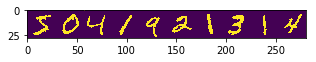

In [16]:
plt.figure(figsize=(5,8))
plt.imshow(output[:, :281])

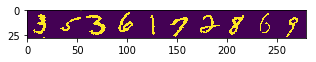

In [17]:
plt.figure(figsize=(5,8))
plt.imshow(output[:, 281:])

In [26]:
reconstruct = pd.DataFrame(output[:,281:])

reconstruct.to_csv('denoised.csv',header=None,index=False)